In [45]:

from sklearn import datasets
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import pairwise_distances

In [46]:
import numpy as np
from sklearn.cluster import KMeans

class MyKNN:
    def __init__(self, k = 5, n_clusters = None):
        self.k = k
        self.n_clusters = n_clusters

    def fit(self, X, y):
        if self.n_clusters is not None:
            # делит данные на N кластеров
            kmeans = KMeans(n_clusters = self.n_clusters, random_state = 42)
            kmeans.fit(X)
            self.X_train = X # создаем переменную внутри класса, чтобы сохранить выборку
            self.centroids = kmeans.clustre_centers_ # координаты центров кластеров
            self.labels = kmeans.labels_
        else:
            self.X_train = X
        self.y_train = y


    def predict(self, X):
        y_pred = []
        for x in X:
            if self.n_clusters is not None:
                # считаем расстояния от текущего x до всех центроидов кластеров.
                distances = np.sqrt(np.sum((self.centroids - x)**2, axis = 1))
                # берём индекс ближайшего кластера.
                cluster_indices = np.argsort(distances)[0]
                # выбираем индексы объектов в обучающей выборке, которые попали в этот кластер.
                nearest_indices = np.where(self.labels == cluster_indices)[0]
                # считаем расстояния от x до всех этих объектов (внутри кластера).
                nearest_distances = np.sqrt(np.sum((self.X_train[nearest_indices] - x)**2, axis = 1))
                # — берём k ближайших из них.
                nearest_indices = nearest_indices[np.argsort(nearest_distances)[:self.k]]
            else:
                distances = np.sqrt(np.sum((self.X_train - x)**2, axis = 1))
                nearest_indices = np.argsort(distances)[:self.k]
                #— просто считаем расстояния до всех обучающих и выбираем k ближайших.
                
            nearest_labels = self.y_train[nearest_indices]
            # находим самую частую метку и сохраняем её как предсказание.
            y_pred.append(np.bincount(nearest_labels).argmax())
        return np.array(y_pred)

In [47]:
! wget -O 'train.csv' -q 'https://www.dropbox.com/s/5bz5a968eeryroj/churn_prediction.csv?dl=0'


In [48]:
train = pd.read_csv('train.csv')
train.sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1741,43,99.3,4209.95,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),0
636,35,19.7,730.4,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
4908,47,63.8,3007.25,Female,0,Yes,Yes,Yes,No,DSL,No,Yes,No,Yes,No,Yes,Two year,No,Bank transfer (automatic),0


In [49]:

y = train['Churn']
X = train.drop(columns='Churn')

In [50]:
X['TotalSpent'] = pd.to_numeric(X['TotalSpent'], errors ='coerce')


In [51]:
X.TotalSpent.fillna(X.TotalSpent.median(), inplace=True)


<ipython-input-51-252a5e12e2a0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X.TotalSpent.fillna(X.TotalSpent.median(), inplace=True)


In [52]:
	

num_data = X.select_dtypes([np.number])
num_features = num_data.columns
cat_data = X.select_dtypes([np.object0])
cat_features = cat_data.columns
     

<ipython-input-52-e8691856774c>:3: DeprecationWarning: `np.object0` is a deprecated alias for ``np.object0` is a deprecated alias for `np.object_`. `object` can be used instead.  (Deprecated NumPy 1.24)`.  (Deprecated NumPy 1.24)
  cat_data = X.select_dtypes([np.object0])


In [53]:
X = pd.concat([X[num_features], pd.get_dummies(X[cat_features], drop_first=True)], axis=1)
X.sample(3)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Male,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,...,HasOnlineTV_No internet service,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1284,12,73.75,871.40,0,True,False,True,True,False,True,...,False,False,False,False,False,False,True,True,False,False
3465,27,48.70,1421.75,0,True,True,False,True,False,False,...,False,False,False,False,True,False,False,True,False,False
924,39,50.65,1905.40,0,False,False,False,False,True,False,...,False,True,False,True,False,False,True,True,False,False


In [54]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
     

In [55]:
scal = StandardScaler()
X[num_features] = scal.fit_transform(X[num_features])
     

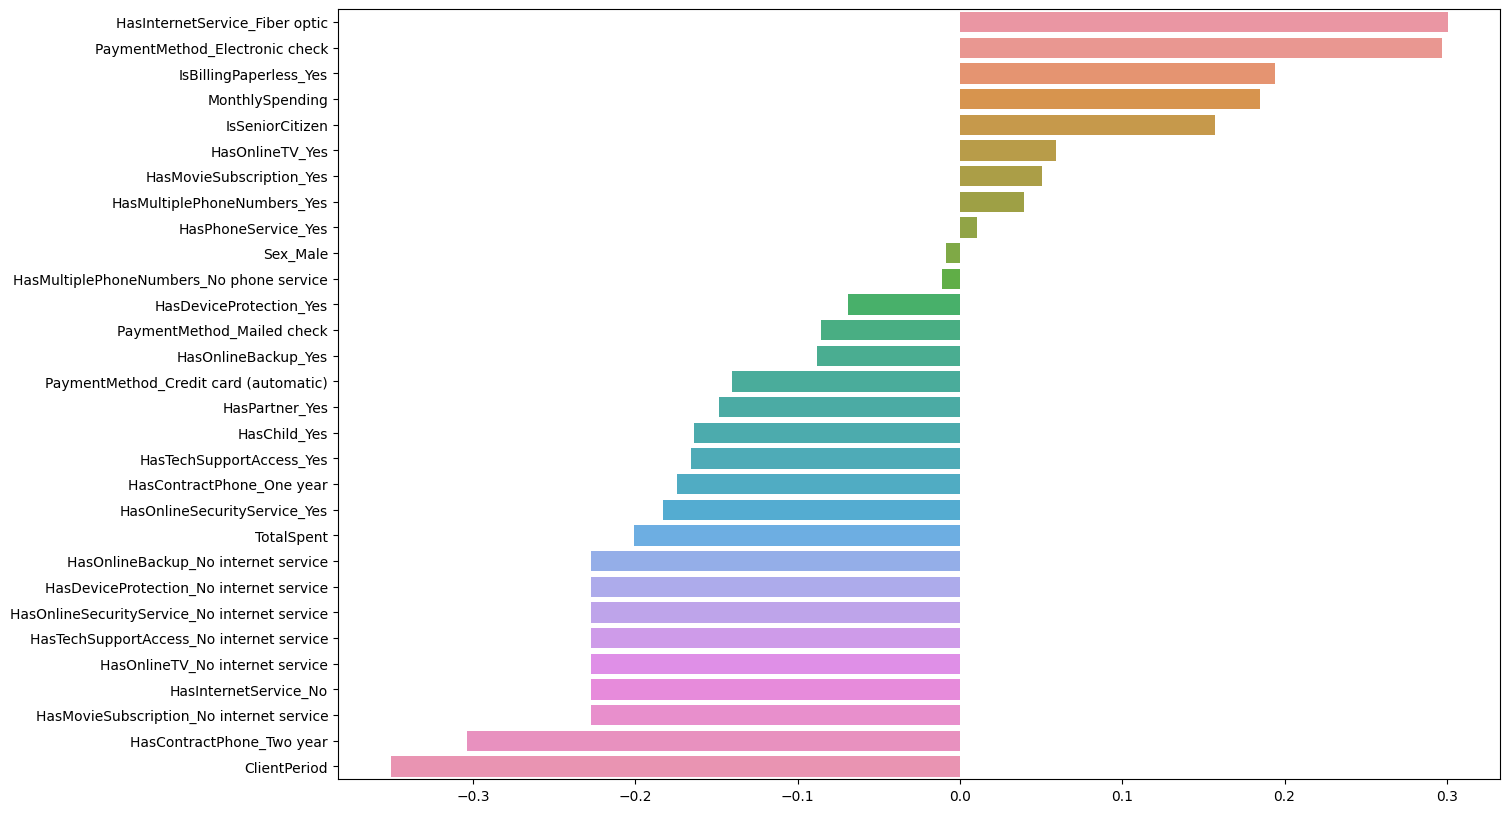

In [56]:
correlations = X.corrwith(y).sort_values(ascending=False)

plot = sns.barplot(y=correlations.index, x=correlations)
plot.figure.set_size_inches(15, 10)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
     

In [59]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import time

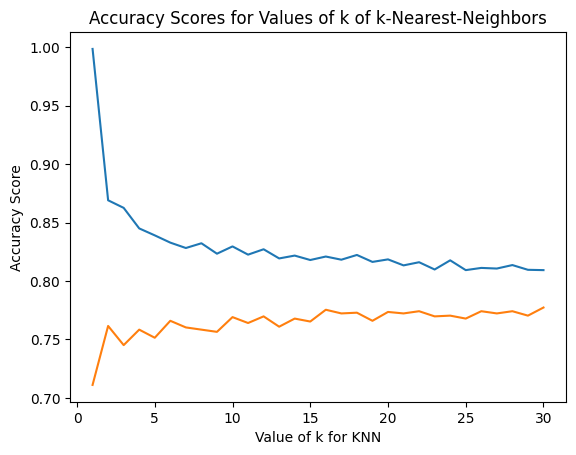

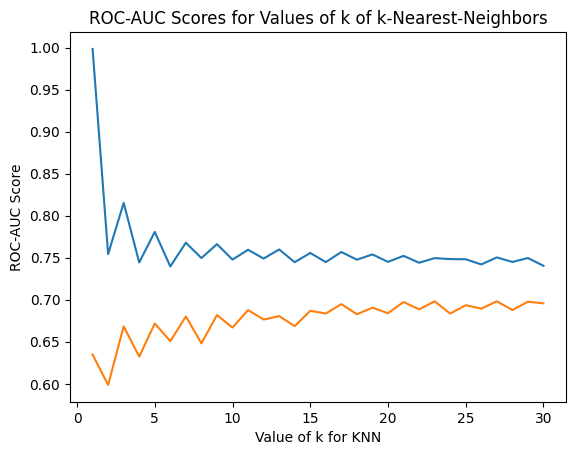

In [60]:
k_range = list(range(1,31))
acc_scores_train = []
acc_scores_test = []

rocauc_scores_train = []
rocauc_scores_test = []

start1 = time.time()
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    acc_scores_train.append(accuracy_score(y_train, y_train_pred))
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    rocauc_scores_train.append(roc_auc_score(y_train,  y_train_pred))
    rocauc_scores_test.append(roc_auc_score(y_test,  y_pred))

stop1 = time.time()
    
plt.plot(k_range, acc_scores_train)
plt.plot(k_range, acc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, rocauc_scores_train)
plt.plot(k_range, rocauc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [61]:

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_pred = clf.predict(X_test)
print('Train accuracy = ', accuracy_score(y_train, y_train_pred))
print('Test accuracy = ', accuracy_score(y_test, y_pred))
print('Train roc-auc = ', roc_auc_score(y_train, y_train_pred))
print('Test roc-auc = ', roc_auc_score(y_test, y_pred))

Train accuracy =  0.8122802272112524
Test accuracy =  0.7899053627760252
Train roc-auc =  0.7346695641106268
Test roc-auc =  0.6957972502926794


MY_KNN

In [62]:
k_range = list(range(1, 31))
acc_scores_train = []
acc_scores_test = []

rocauc_scores_train = []
rocauc_scores_test = []

start2 = time.time()
for k in k_range:
    knn = MyKNN(k=k)
    knn.fit(X_train, y_train)
    y_train_pred = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    acc_scores_train.append(accuracy_score(y_train, y_train_pred))
    acc_scores_test.append(accuracy_score(y_test, y_pred))
    rocauc_scores_train.append(roc_auc_score(y_train,  y_train_pred))
    rocauc_scores_test.append(roc_auc_score(y_test,  y_pred))

stop2 = time.time()

plt.plot(k_range, acc_scores_train)
plt.plot(k_range, acc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

plt.plot(k_range, rocauc_scores_train)
plt.plot(k_range, rocauc_scores_test)
plt.xlabel('Value of k for KNN')
plt.ylabel('ROC-AUC Score')
plt.title('ROC-AUC Scores for Values of k of k-Nearest-Neighbors')
plt.show()

TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method